In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

df = pd.read_csv('data.csv')

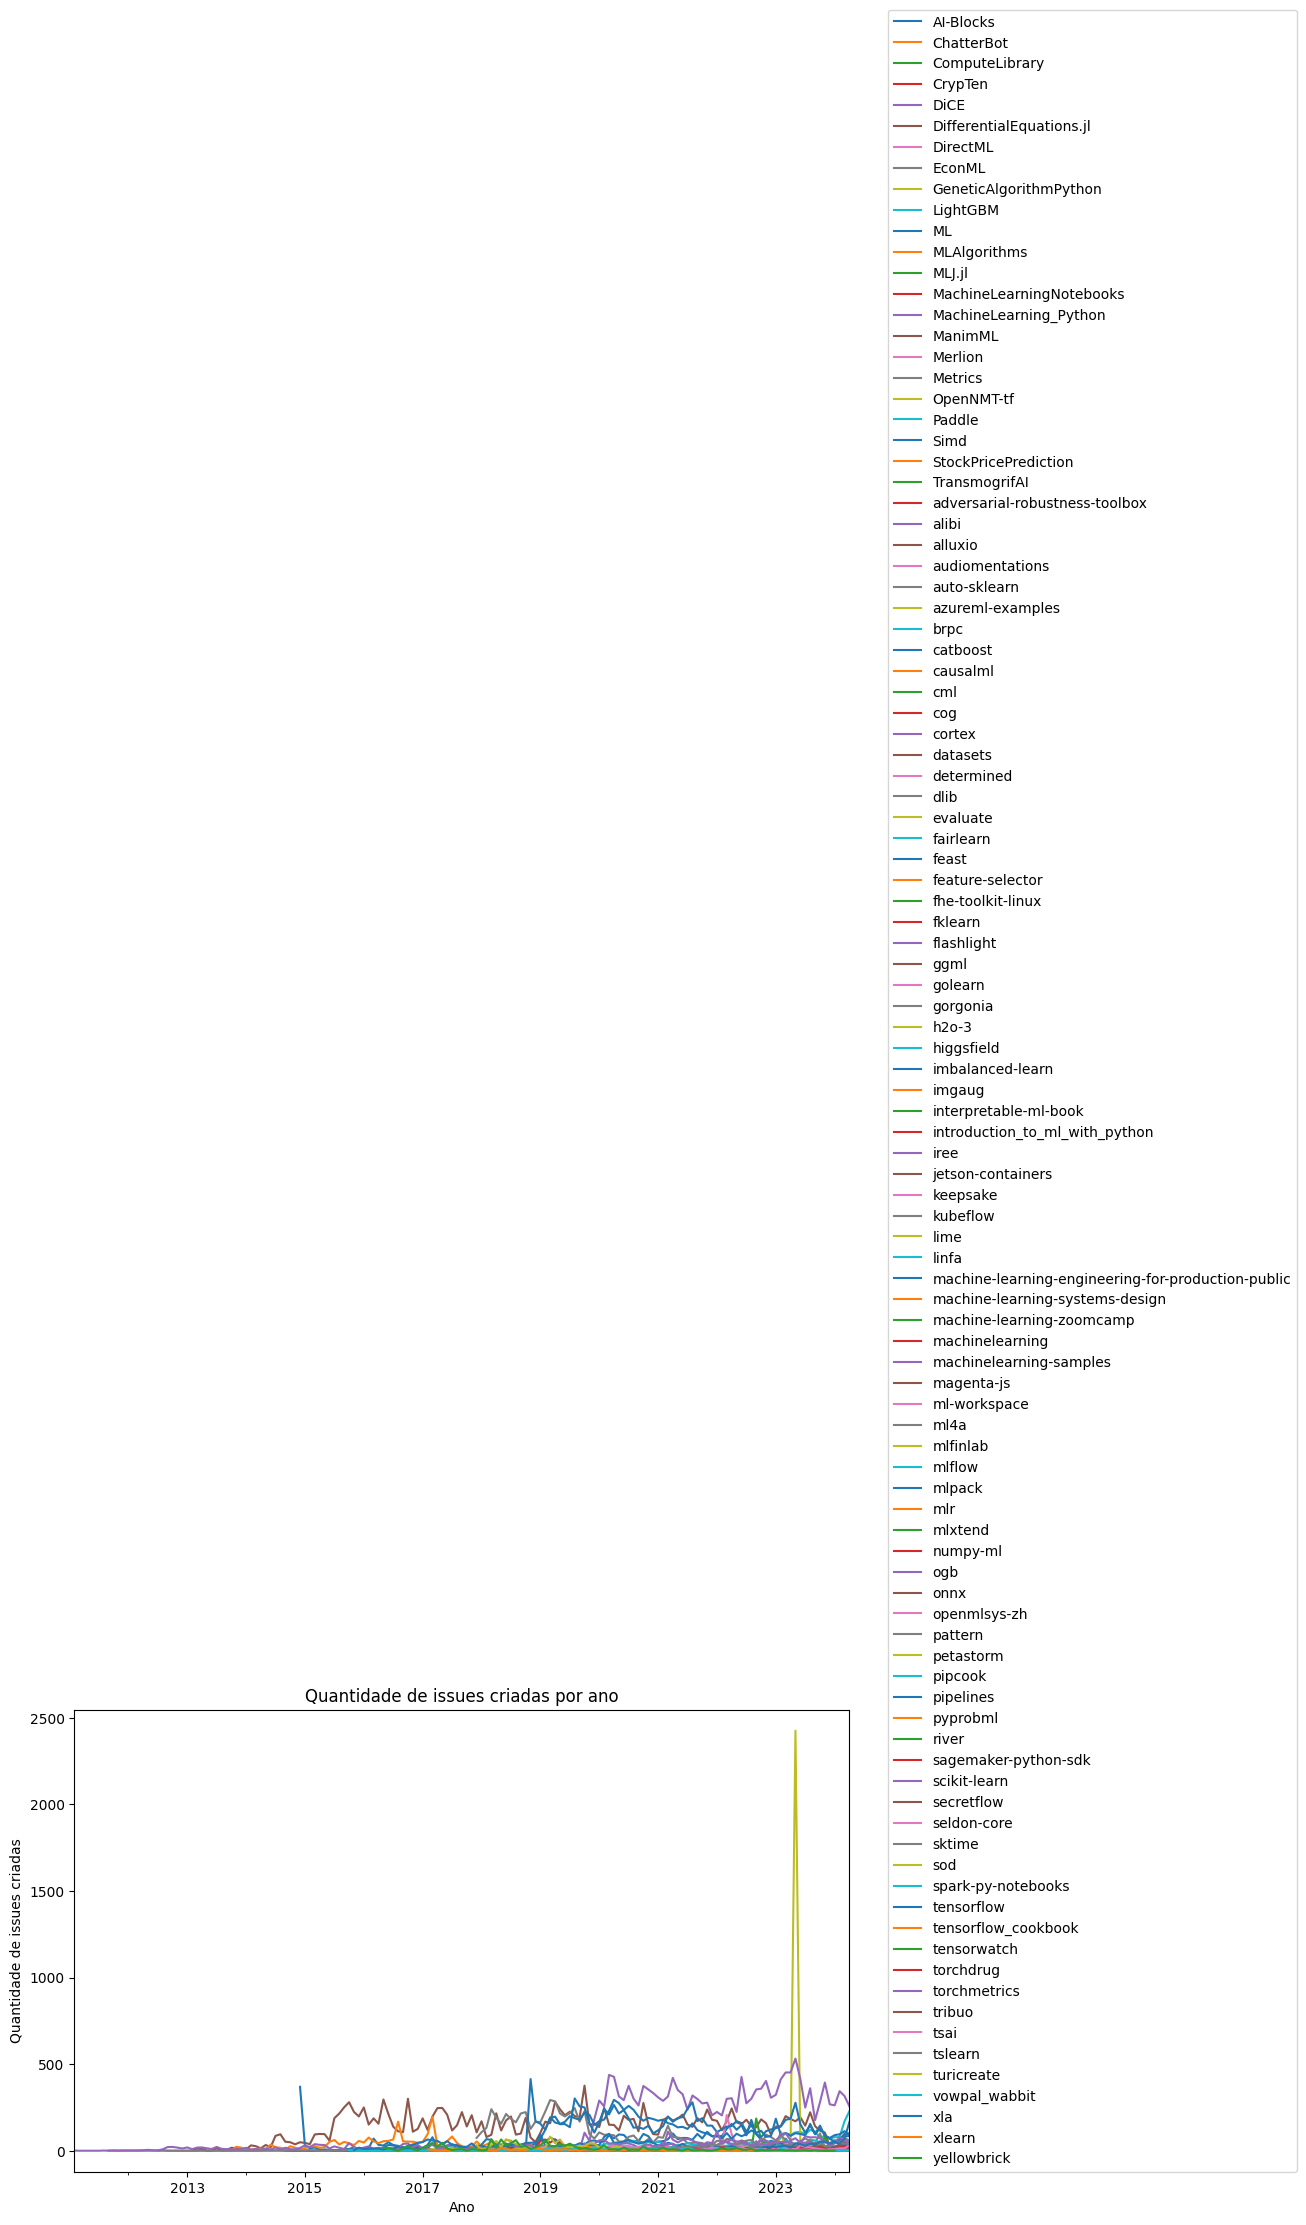

In [2]:
created_at_df = pd.to_datetime(df['Created At'])
df['Created At'] = created_at_df
plt.figure(figsize=(10, 6))
for project, group in df.groupby('Project'):
    group.set_index('Created At')['Issue Number'].resample('M').count().plot(label=project)
plt.title('Quantidade de issues criadas por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de issues criadas')
plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
plt.show()

/tmp/ipykernel_83383/3690174272.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_counts = df.groupby('Project').sum().sum()


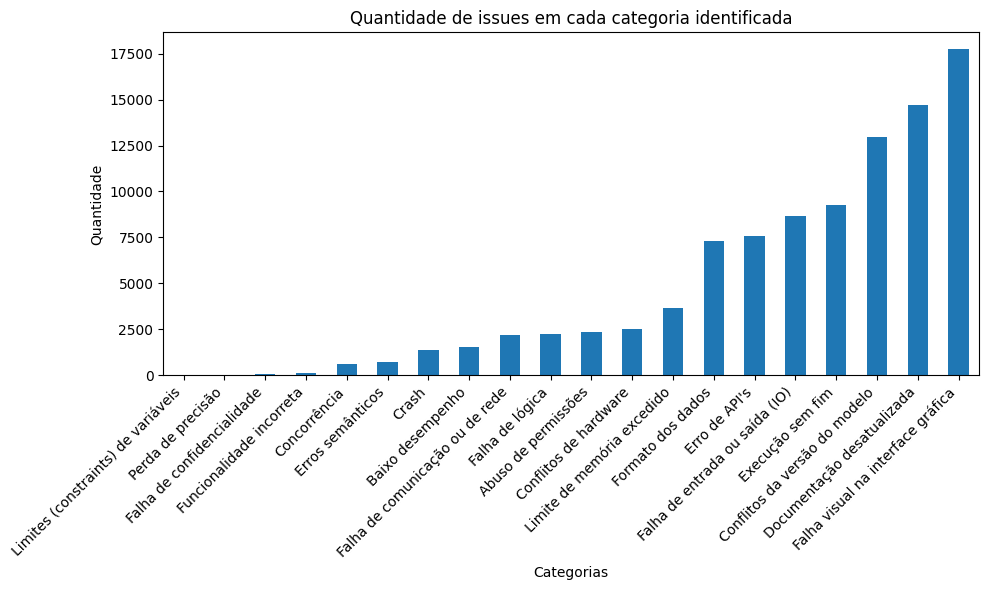

In [3]:
df = pd.read_csv('data.csv')

df = df.drop(['Issue Number', 'URL', 'State', 'Created At', 'Updated At', 'Assignee', 'Labels', 'Comments', 'Title'], axis=1)

category_counts = df.groupby('Project').sum().sum()

category_counts_sorted = category_counts.sort_values()

plt.figure(figsize=(10, 6))
category_counts_sorted.plot(kind='bar')
plt.title("Quantidade de issues em cada categoria identificada")
plt.xlabel("Categorias")
plt.ylabel("Quantidade")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

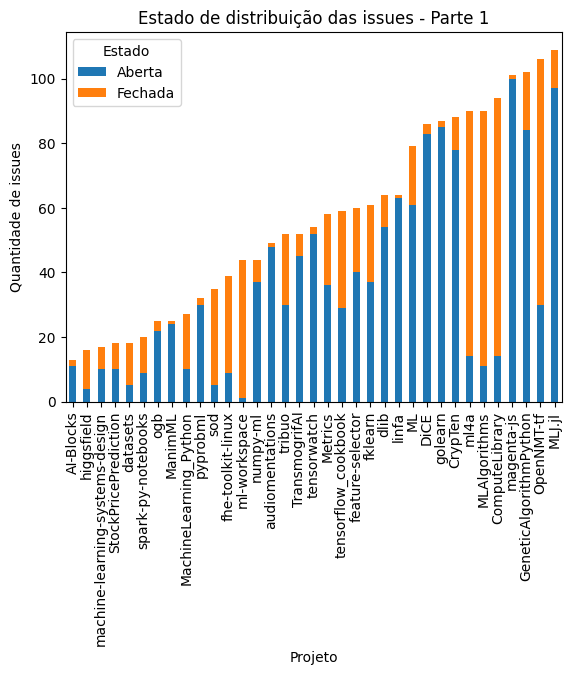

<Figure size 1000x500 with 0 Axes>

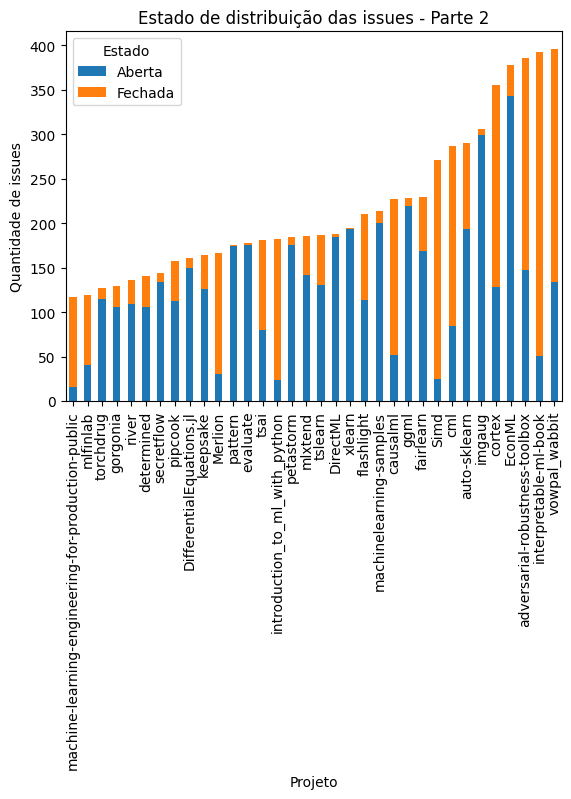

<Figure size 1000x500 with 0 Axes>

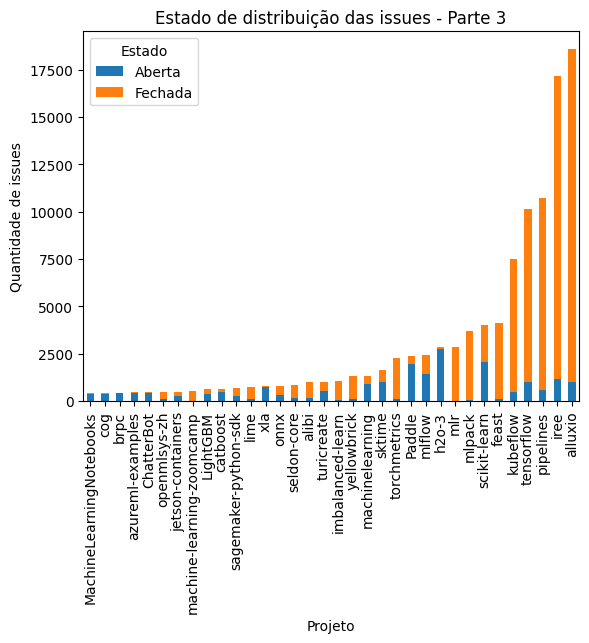

In [9]:
df = pd.read_csv('data.csv')

df['State'] = df['State'].replace({'open': 'Aberta', 'closed': 'Fechada'})

state_counts = df.groupby(['Project', 'State']).size().unstack(fill_value=0)

sorted_projects = state_counts.sum(axis=1).sort_values().index
sorted_state_counts = state_counts.loc[sorted_projects]

split_data = np.array_split(sorted_state_counts, 3)

for i, part in enumerate(split_data):
    plt.figure(figsize=(10, 5))
    part.plot(kind='bar', stacked=True)
    plt.title(f'Estado de distribuição das issues - Parte {i + 1}')
    plt.xlabel('Projeto')
    plt.ylabel('Quantidade de issues')
    plt.legend(title='Estado')
    plt.show()

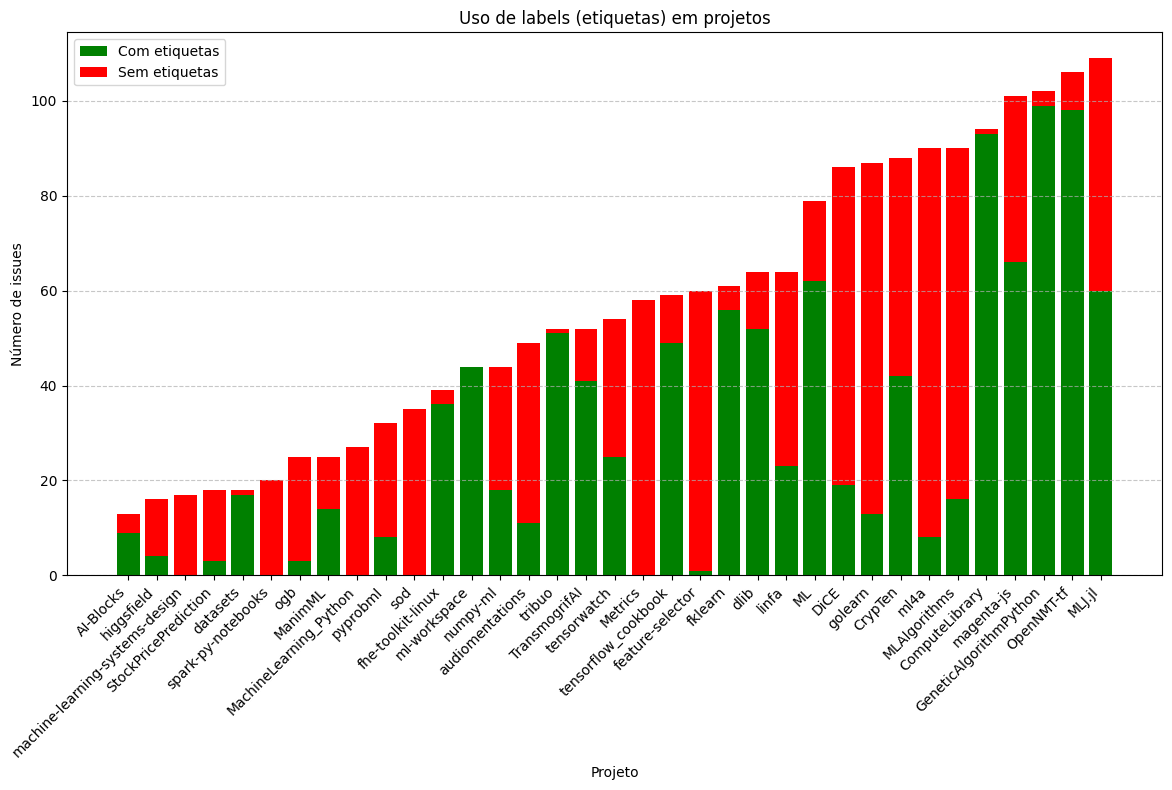

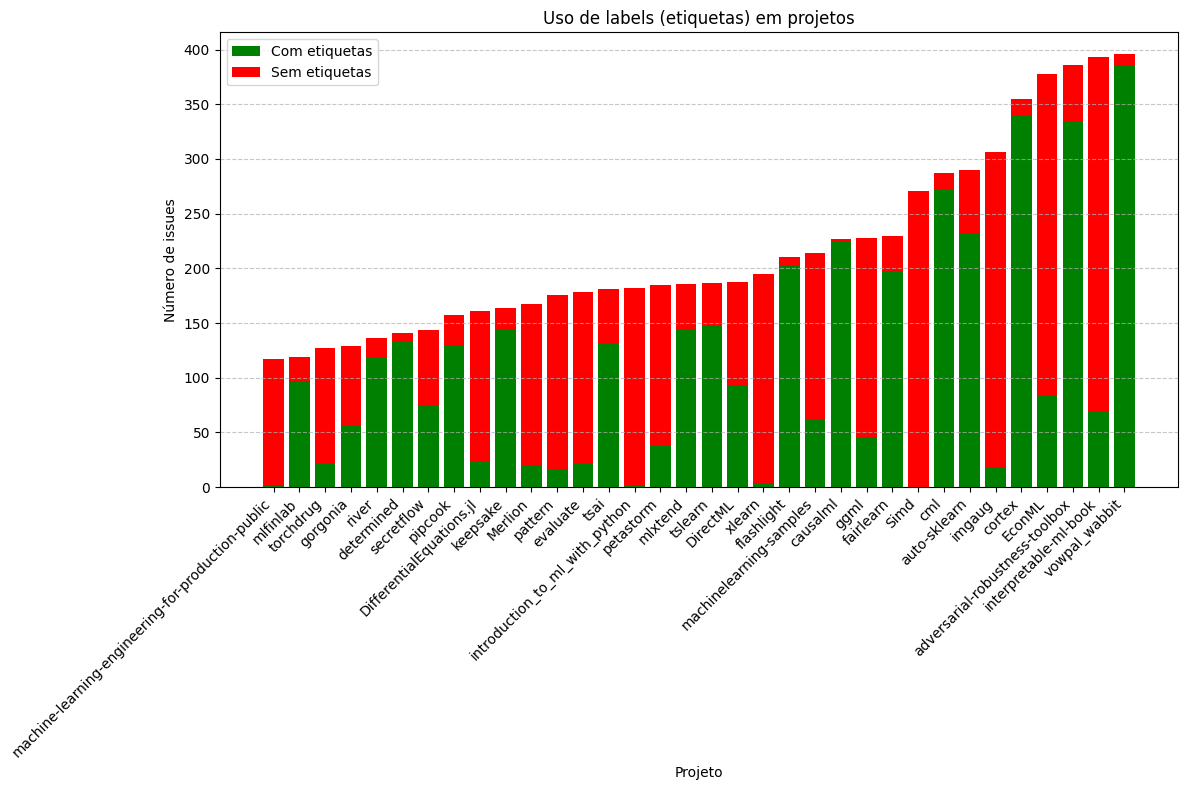

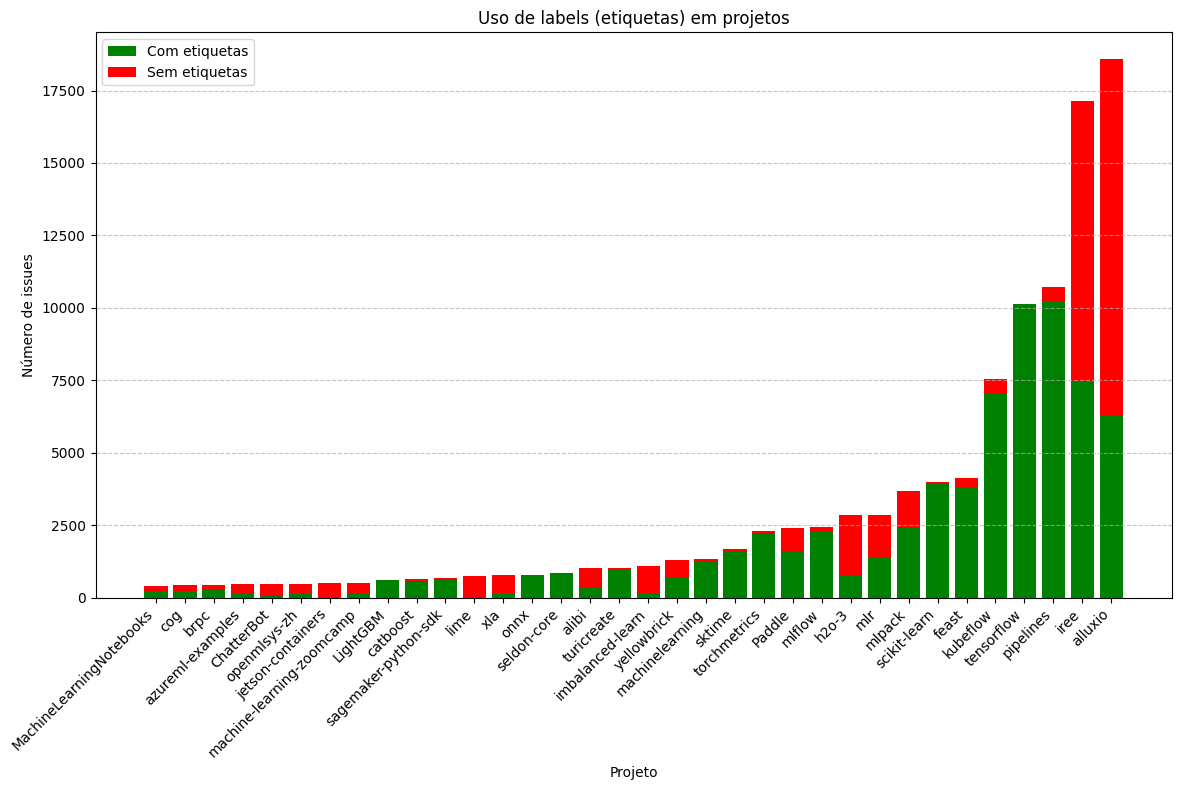

In [10]:
import matplotlib.pyplot as plt

grouped = df.groupby('Project')['Labels'].apply(lambda x: x.notnull().sum()).reset_index(name='With Labels')
grouped['Without Labels'] = df.groupby('Project')['Labels'].apply(lambda x: x.isnull().sum()).values

grouped['Total'] = grouped['With Labels'] + grouped['Without Labels']
grouped = grouped.sort_values(by='Total')

split_data = np.array_split(grouped, 3)

for i, part in enumerate(split_data):
  plt.figure(figsize=(12, 8))
  plt.bar(part['Project'], part['With Labels'], color='green', label='Com etiquetas')
  plt.bar(part['Project'], part['Without Labels'], bottom=part['With Labels'], color='red', label='Sem etiquetas')

  plt.xlabel('Projeto')
  plt.ylabel('Número de issues')
  plt.title('Uso de labels (etiquetas) em projetos')
  plt.legend()
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()


In [11]:
df = pd.read_csv('data.csv')
grouped = df.groupby("Project").sum()

output_dir = 'graphs/categories'
os.makedirs(output_dir, exist_ok=True)

for project in grouped.index:
    categories = grouped.columns[7:] 
    values = grouped.loc[project][7:]

    sorted_pairs = sorted(zip(values, categories))
    values_sorted, categories_sorted = zip(*sorted_pairs)

    plt.figure(figsize=(10, 6))
    plt.bar(categories_sorted, values_sorted)
    plt.title(f"Quantidade de issues por categoria do projeto '{project}'")
    plt.xlabel("Categorias")
    plt.ylabel("Quantidade")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.savefig(f'{output_dir}/{project}_categories.png')
    plt.close()

/tmp/ipykernel_83383/3211440484.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby("Project").sum()


In [36]:
df = pd.read_csv('data.csv')
closed_df = df[df['State'] == 'closed']

closed_df['Created At'] = pd.to_datetime(closed_df['Created At'])
closed_df['Updated At'] = pd.to_datetime(closed_df['Updated At'])

closed_df['Closing Time'] = (closed_df['Updated At'] - closed_df['Created At']).dt.total_seconds() / 3600

average_closing_time = closed_df.groupby('Project')['Closing Time'].mean()

df = closed_df

/tmp/ipykernel_83383/2747070912.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_df['Created At'] = pd.to_datetime(closed_df['Created At'])
/tmp/ipykernel_83383/2747070912.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_df['Updated At'] = pd.to_datetime(closed_df['Updated At'])
/tmp/ipykernel_83383/2747070912.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

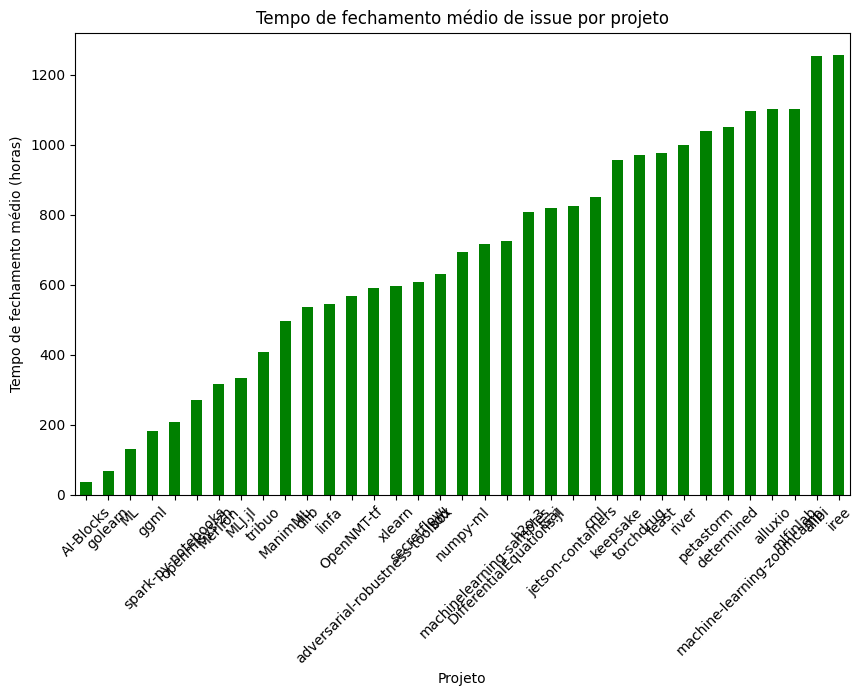

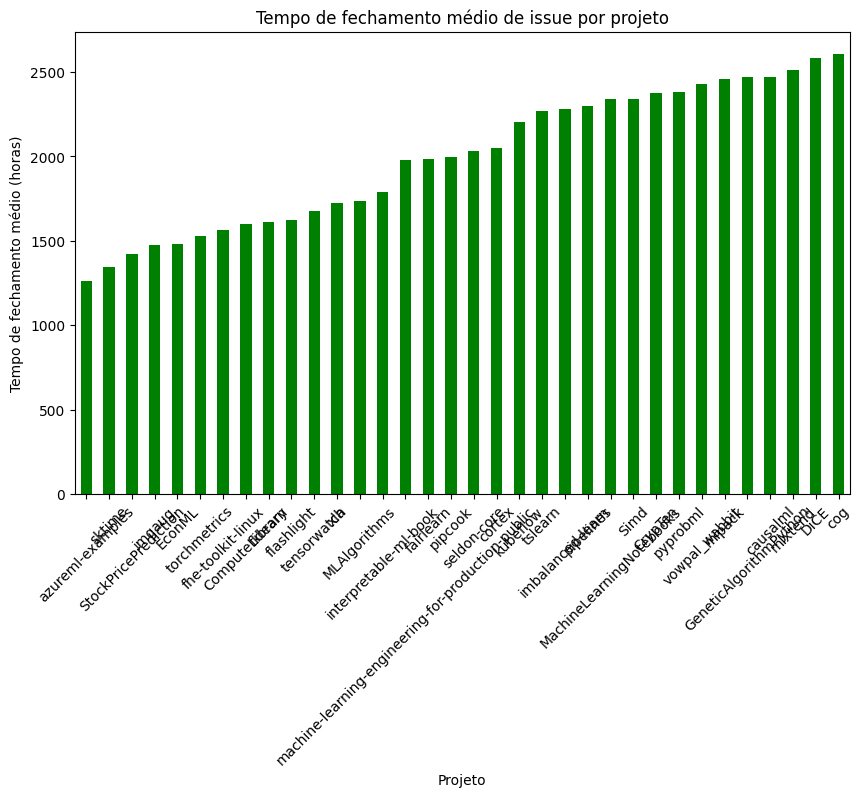

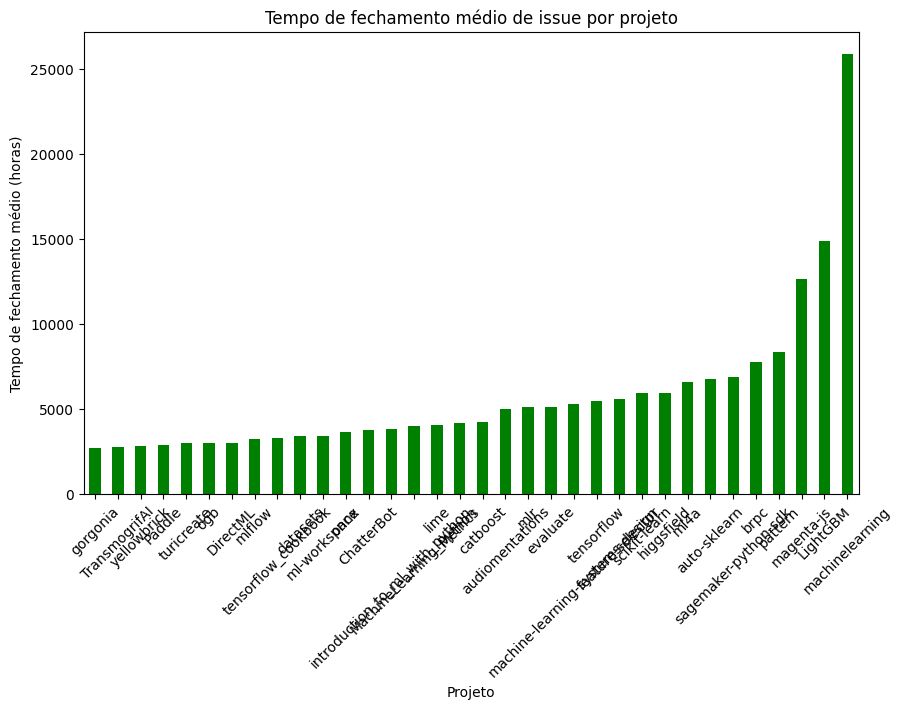

In [13]:
average_closing_time = average_closing_time.sort_values()
split_data = np.array_split(average_closing_time, 3)

for i, part in enumerate(split_data):
  plt.figure(figsize=(10, 6))
  part.plot(kind='bar', color='green')
  plt.title('Tempo de fechamento médio de issue por projeto')
  plt.xlabel('Projeto')
  plt.ylabel('Tempo de fechamento médio (horas)')
  plt.xticks(rotation=45)
  plt.show()

/tmp/ipykernel_83383/260065345.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_df['Project'] = pd.Categorical(closed_df['Project'], categories=sorted_projects, ordered=True)
/tmp/ipykernel_83383/260065345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_df.sort_values('Project', inplace=True)


<Figure size 1200x800 with 0 Axes>

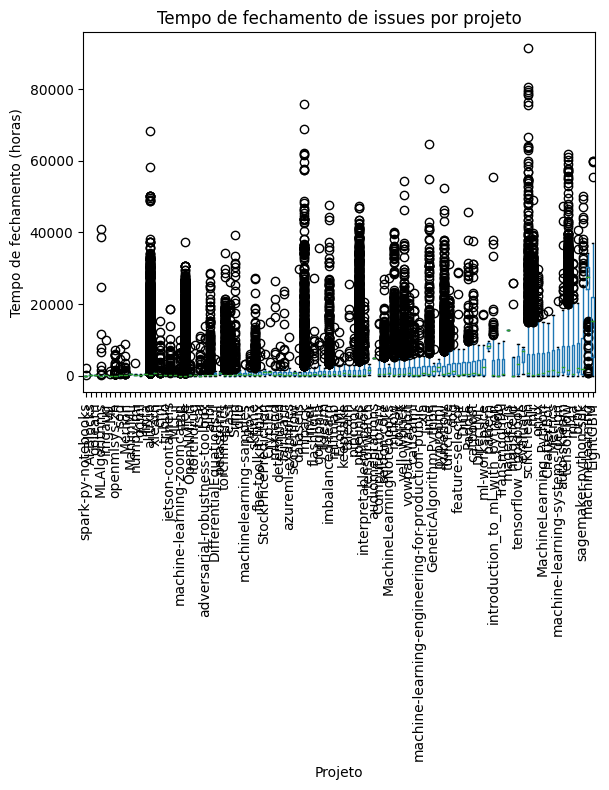

In [14]:
outliers = closed_df.groupby('Project')['Closing Time'].apply(lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
sorted_projects = outliers.sort_values().index

closed_df['Project'] = pd.Categorical(closed_df['Project'], categories=sorted_projects, ordered=True)
closed_df.sort_values('Project', inplace=True)

plt.figure(figsize=(12, 8))
closed_df.boxplot(column='Closing Time', by='Project', grid=False, rot=90)
plt.title('Tempo de fechamento de issues por projeto')
plt.suptitle('')
plt.xlabel('Projeto')
plt.ylabel('Tempo de fechamento (horas)')
plt.show()


/tmp/ipykernel_83383/2867443638.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_df['Project'] = pd.Categorical(closed_df['Project'], categories=sorted_projects, ordered=True)
/tmp/ipykernel_83383/2867443638.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_df.sort_values('Project', inplace=True)


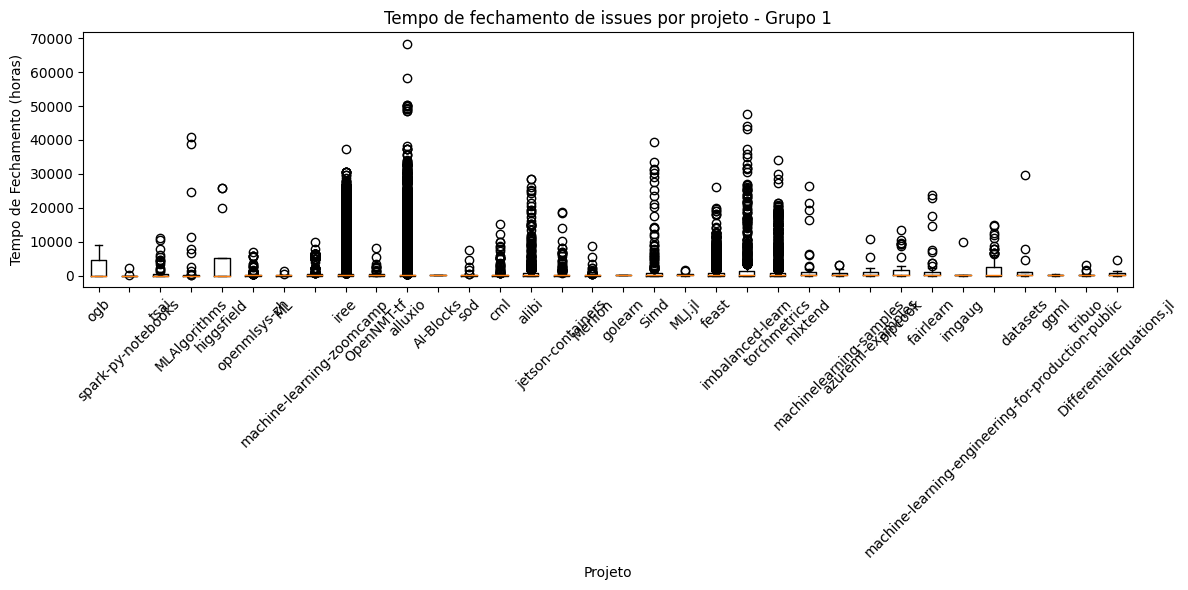

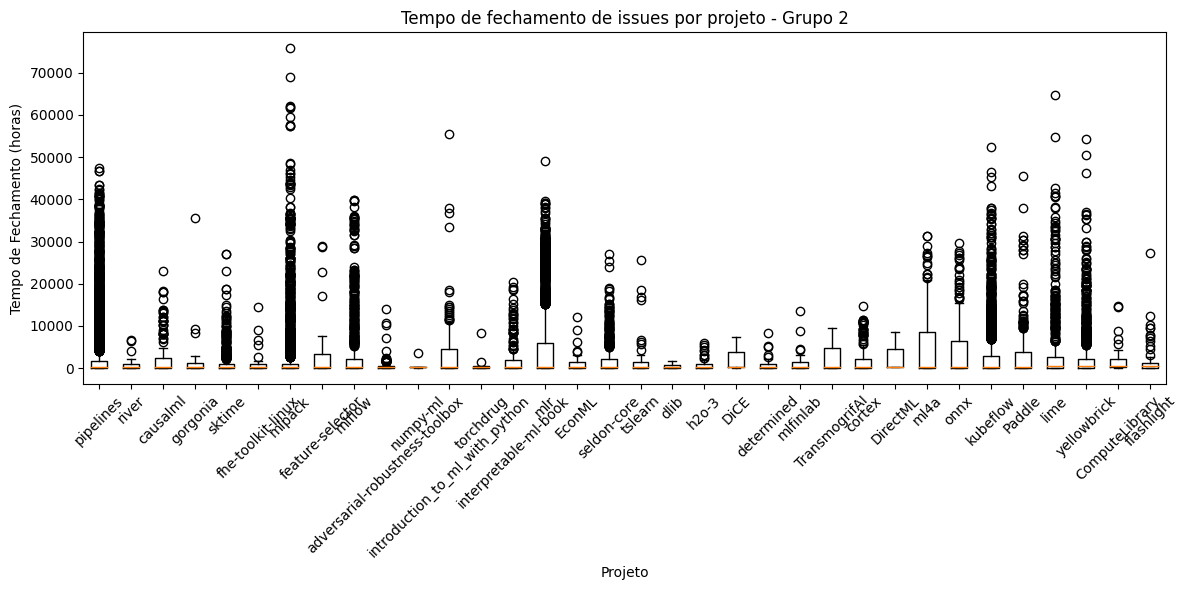

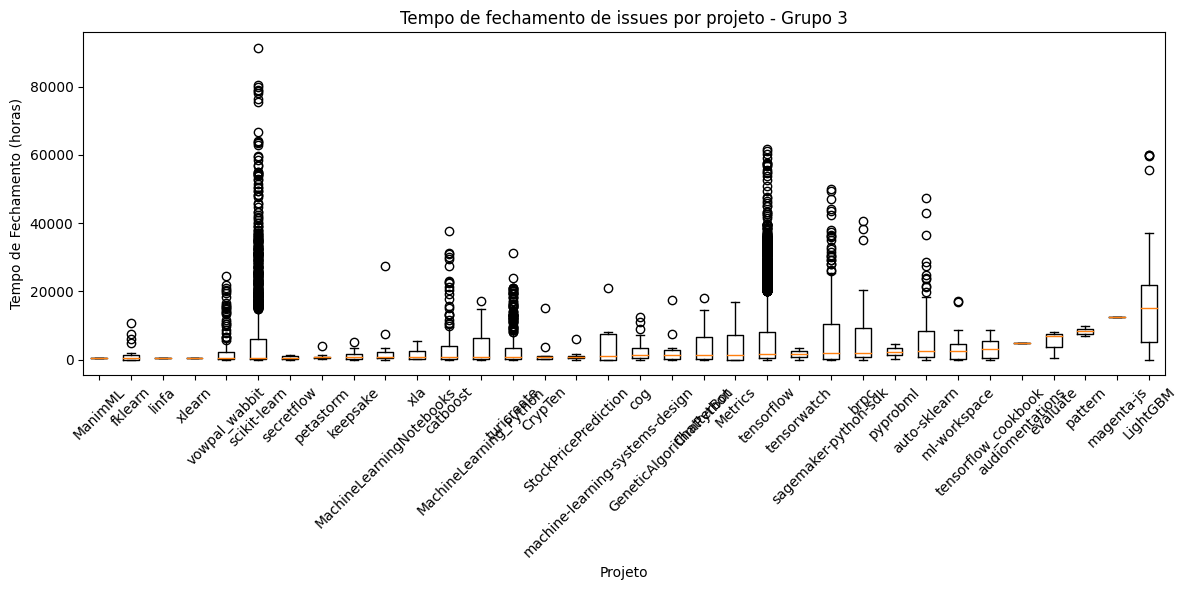

In [21]:
outliers = closed_df.groupby('Project')['Closing Time'].apply(lambda x: x.median() + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
sorted_projects = outliers.sort_values().index

sorted_projects = closed_df.groupby('Project')['Closing Time'].median().sort_values().index

closed_df['Project'] = pd.Categorical(closed_df['Project'], categories=sorted_projects, ordered=True)
closed_df.sort_values('Project', inplace=True)

num_projects = len(sorted_projects)
group_size = num_projects // 3
groups = [sorted_projects[i:i + group_size] for i in range(0, num_projects, group_size)]

for i, group in enumerate(groups):
    if i == 3:
        break
    
    group_df = closed_df[closed_df['Project'].isin(group)]
    plt.figure(figsize=(12, 6))
    plt.boxplot([group_df[group_df['Project'] == proj]['Closing Time'] for proj in group], labels=group)
    plt.title('Tempo de fechamento de issues por projeto - Grupo {}'.format(i+1))
    plt.xlabel('Projeto')
    plt.ylabel('Tempo de Fechamento (horas)')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout()
    plt.show()


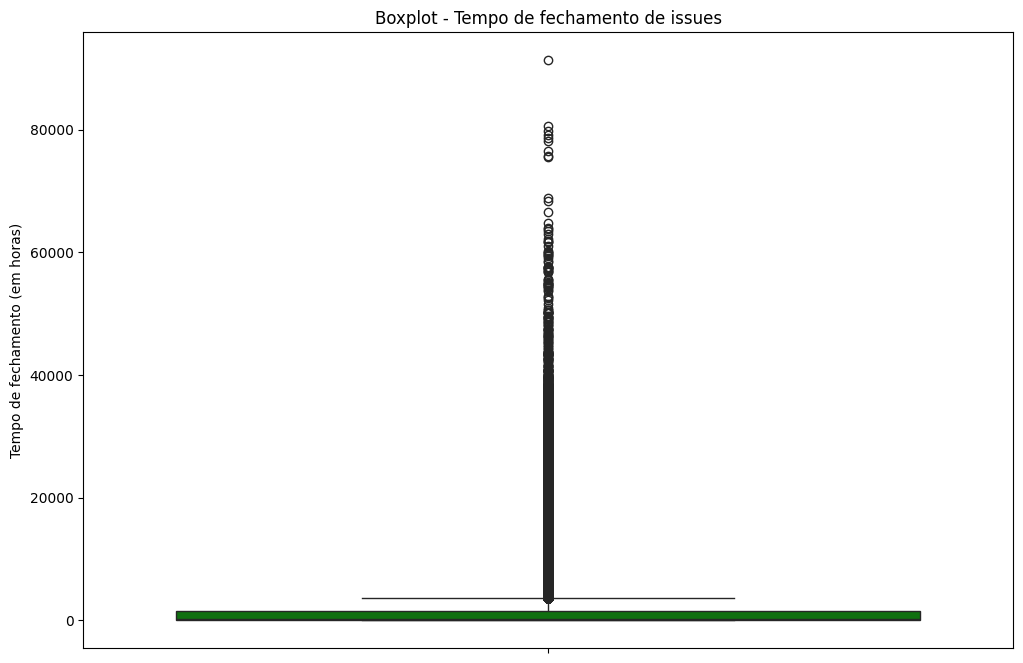

Q1: 14.37
Q2 (mediana): 137.06
Q3: 1455.45


In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(y=closed_df['Closing Time'], color='green')

plt.title('Boxplot - Tempo de fechamento de issues')
plt.ylabel('Tempo de fechamento (em horas)')
plt.show()

q1 = closed_df['Closing Time'].quantile(0.25)
q2 = closed_df['Closing Time'].median()
q3 = closed_df['Closing Time'].quantile(0.75)

print( f'Q1: {q1:.2f}')
print(f'Q2 (mediana): {q2:.2f}')
print(f'Q3: {q3:.2f}')


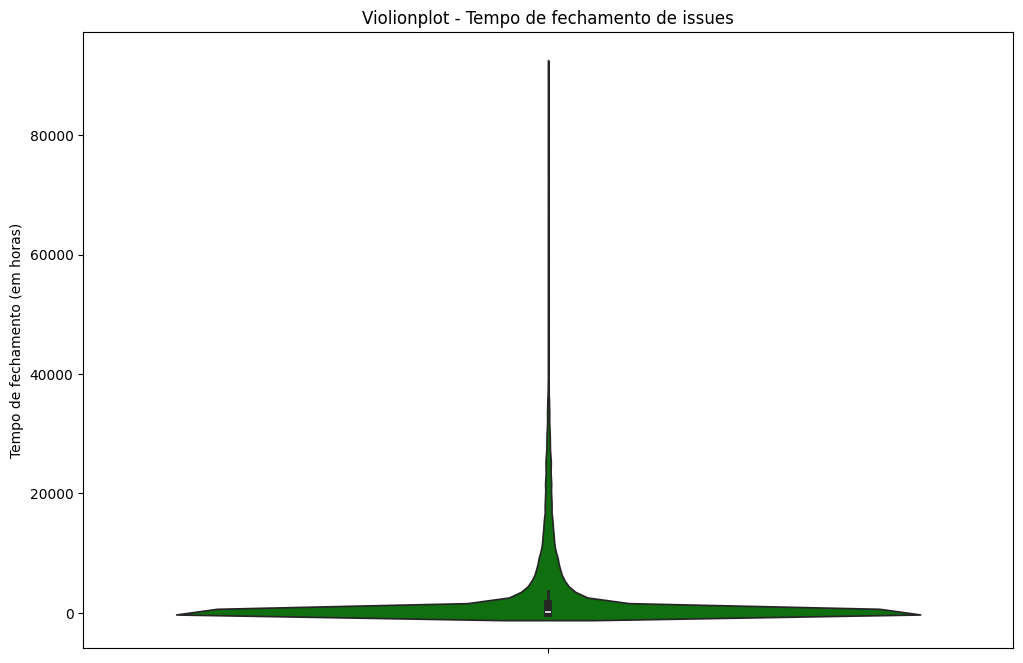

In [18]:
plt.figure(figsize=(12, 8))
sns.violinplot(y=closed_df['Closing Time'], color='green')
plt.title('Violionplot - Tempo de fechamento de issues')
plt.ylabel('Tempo de fechamento (em horas)')
plt.show()

In [22]:
top_projects = ['tensorflow', 'scikit-learn', 'Paddle', 'onnx', 'mlflow', 'LightGBM', 'brpc', 'numpy-ml', 'imgaug', 'ChatterBot']

/tmp/ipykernel_83383/1847378989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Project'] = pd.Categorical(df['Project'], categories=top_projects, ordered=True)


<Figure size 1200x800 with 0 Axes>

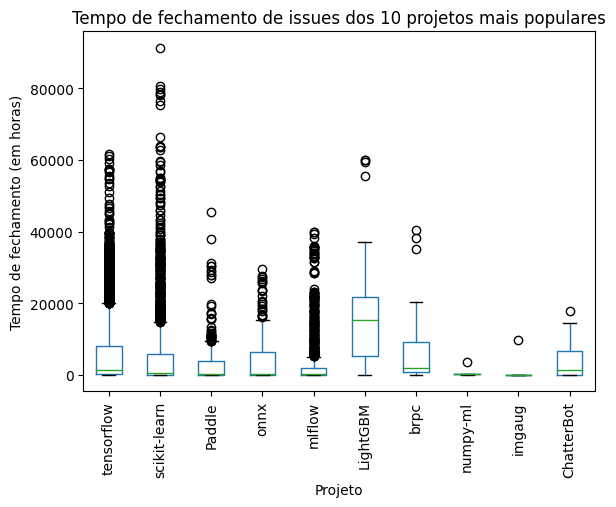

In [29]:
df['Project'] = pd.Categorical(df['Project'], categories=top_projects, ordered=True)

top_projects_df = df[df['Project'].isin(top_projects)]

plt.figure(figsize=(12, 8))
top_projects_df.boxplot(column='Closing Time', by='Project', grid=False, rot=90)

plt.title('Tempo de fechamento de issues dos 10 projetos mais populares')
plt.suptitle('')
plt.xlabel('Projeto')
plt.ylabel('Tempo de fechamento (em horas)')
plt.show()

/tmp/ipykernel_83383/3233803238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Project'] = pd.Categorical(df['Project'], categories=top_projects, ordered=True)


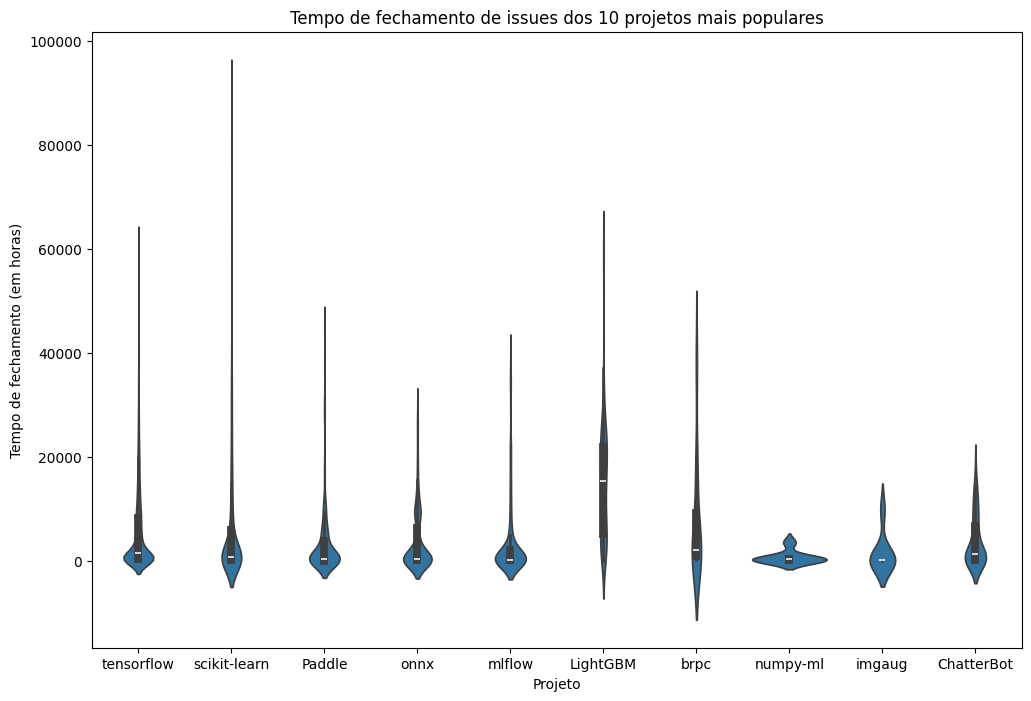

In [30]:
df['Project'] = pd.Categorical(df['Project'], categories=top_projects, ordered=True)

top_projects_df = df[df['Project'].isin(top_projects)]

plt.figure(figsize=(12, 8))
sns.violinplot(x='Project', y='Closing Time', data=top_projects_df)

plt.title('Tempo de fechamento de issues dos 10 projetos mais populares')
plt.suptitle('')
plt.xlabel('Projeto')
plt.ylabel('Tempo de fechamento (em horas)')
plt.show()

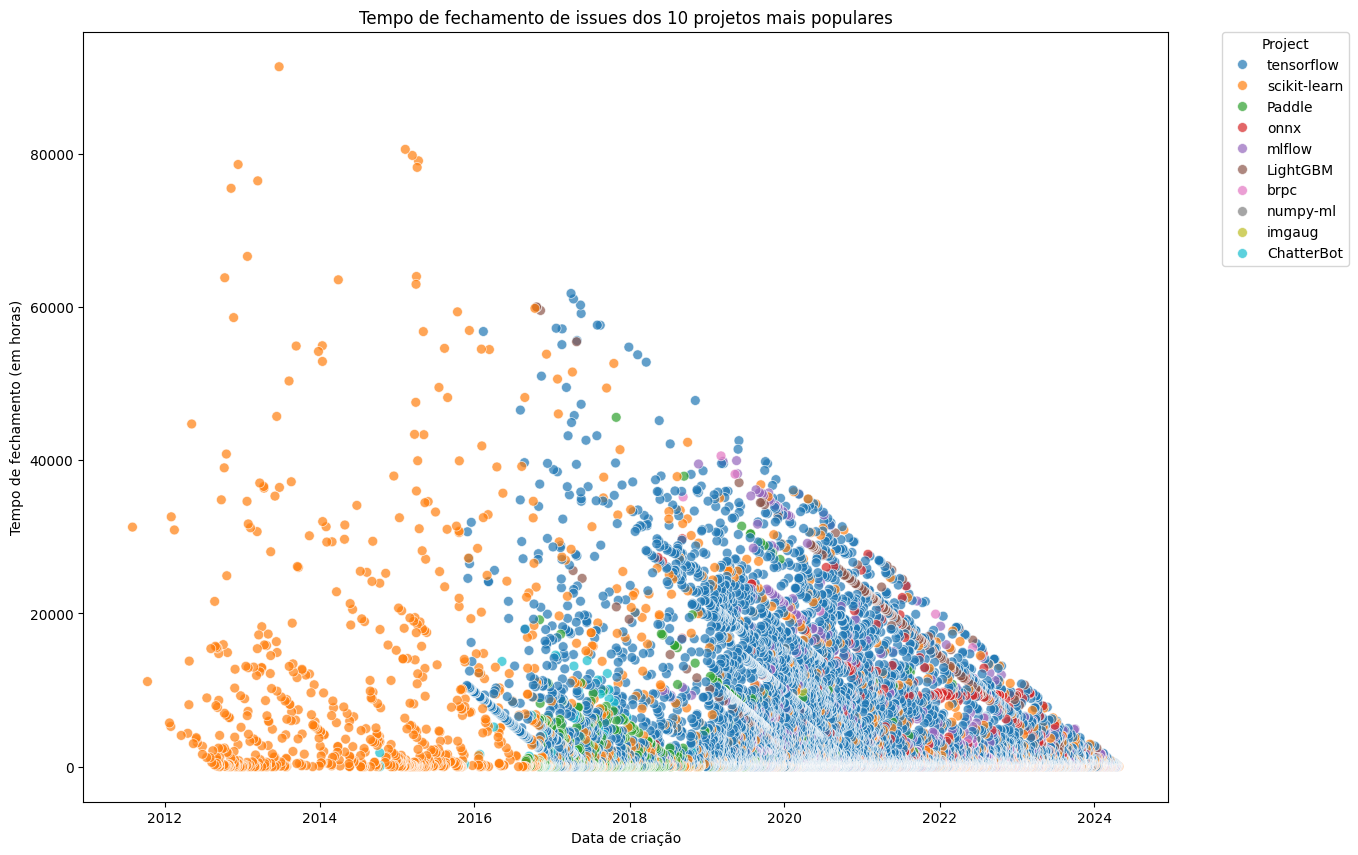

In [33]:
selected_projects_df = df[df['Project'].isin(top_projects)]

plt.figure(figsize=(14, 10))
sns.scatterplot(data=selected_projects_df, x='Created At', y='Closing Time', hue='Project', palette='tab10', s=50, alpha=0.7)
plt.title('Tempo de fechamento de issues dos 10 projetos mais populares')
plt.xlabel('Ano de criação')
plt.ylabel('Tempo de fechamento (em horas)')
plt.legend(title='Project', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [41]:
df = pd.read_csv('data.csv')
closed_df = df[df['State'] == 'closed']

closed_df['Created At'] = pd.to_datetime(closed_df['Created At'])
closed_df['Updated At'] = pd.to_datetime(closed_df['Updated At'])

closed_df['Closing Time'] = (abs(closed_df['Updated At'] - closed_df['Created At'])).dt.total_seconds() / 3600

average_closing_time = closed_df.groupby('Project')['Closing Time'].mean()

df = closed_df

issue_counts = df['Project'].value_counts()
top_projects = issue_counts.head(103).index

os.makedirs('graphs/violin', exist_ok=True)
os.makedirs('graphs/boxplots', exist_ok=True)

for project in top_projects:
    project_df = df[df['Project'] == project]
    
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=project_df, y='Closing Time', inner='box', density_norm='width', color='green')
    plt.title(f'Violin Plot do tempo de fechamento de issues do projeto {project}')
    plt.xlabel('Projeto')
    plt.ylabel('Tempo de fechamento (em horas)')
    violin_plot_path = f'graphs/violin/{project}_violin_plot.png'
    plt.savefig(violin_plot_path)
    plt.close()
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=project_df, y='Closing Time', color='green')
    plt.title(f'Boxplot do tempo de fechamento de issues do projeto {project}')
    plt.xlabel('Projeto')
    plt.ylabel('Tempo de fechamento (em horas)')
    boxplot_path = f'graphs/boxplots/{project}_boxplot.png'
    plt.savefig(boxplot_path)
    plt.close()

print("Plots have been saved to the 'graphs/violin' and 'graphs/boxplots' directories.")

/tmp/ipykernel_83383/1325065532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_df['Created At'] = pd.to_datetime(closed_df['Created At'])
/tmp/ipykernel_83383/1325065532.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_df['Updated At'] = pd.to_datetime(closed_df['Updated At'])
/tmp/ipykernel_83383/1325065532.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

Plots have been saved to the 'graphs/violin' and 'graphs/boxplots' directories.
